In [15]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

tickers = ["TTE.PA", "BN.PA", "SAN.PA", "BNP.PA", "ENGI.PA", "ORA.PA", "MC.PA", "CS.PA", "OR.PA", "GLE.PA"]

data = yf.download(tickers, start="2015-01-01", end="2024-01-01")['Adj Close']
returns = data.pct_change().dropna()

[*********************100%%**********************]  10 of 10 completed


In [16]:
# Rendement moyen espéré annuel
expected_returns = returns.mean() * 252

# Matrice de covariance des rendements annuels
cov_matrix = returns.cov() * 252

# Nombre de titres dans le portefeuille
num_assets = len(tickers)

In [17]:
# Simulation permettant de backtester 10000 portefeuilles
num_portfolios = 10000

# Stocker les résultats : rendement, volatilité, ratio de Sharpe et pondérations
results = np.zeros((4, num_portfolios))
all_weights = np.zeros((num_portfolios, num_assets))  # Stocker les pondérations de chaque portefeuille

for i in range(num_portfolios):
    # Générer des pondérations aléatoires
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)  # La somme des pondérations doit être égale à 1
    
    # Calcul du rendement du portefeuille
    portfolio_return = np.sum(weights * expected_returns)
    
    # Calcul de la volatilité (écart type) du portefeuille
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    # Calcul du ratio de Sharpe (rendement/volatilité)
    sharpe_ratio = portfolio_return / portfolio_volatility
    
    # Stocker les résultats
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe_ratio
    
    # Stocker les pondérations du portefeuille
    all_weights[i, :] = weights

In [18]:
# Trouver l'indice du portefeuille avec le ratio de Sharpe maximal
max_sharpe_idx = np.argmax(results[2])

# Récupérer les statistiques du portefeuille à ratio de Sharpe maximal
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

# Afficher les résultats
print(f"Portefeuille Optimal (Maximisation du Ratio de Sharpe):")
print(f"Rendement Espéré: {max_sharpe_return:.2f}")
print(f"Volatilité: {max_sharpe_volatility:.2f}")
print(f"Ratio de Sharpe: {max_sharpe_ratio:.2f}")

Portefeuille Optimal (Maximisation du Ratio de Sharpe):
Rendement Espéré: 0.17
Volatilité: 0.20
Ratio de Sharpe: 0.83


In [19]:
# Trouver l'indice du portefeuille avec le ratio de Sharpe maximal
max_sharpe_idx = np.argmax(results[2])

# Récupérer les pondérations du portefeuille avec le meilleur ratio de Sharpe
optimal_weights = all_weights[max_sharpe_idx, :]

# Afficher les pondérations des titres dans le portefeuille optimal
print(f"Pondérations du portefeuille optimal : {optimal_weights}")
print(f"Titres correspondants : {tickers}")

Pondérations du portefeuille optimal : [0.0660408  0.02676967 0.09728994 0.02773391 0.00772973 0.30038727
 0.24647641 0.03762019 0.01472242 0.17522965]
Titres correspondants : ['TTE.PA', 'BN.PA', 'SAN.PA', 'BNP.PA', 'ENGI.PA', 'ORA.PA', 'MC.PA', 'CS.PA', 'OR.PA', 'GLE.PA']


In [20]:
# Afficher la composition du portefeuille optimal avec les tickers
optimal_portfolio = pd.DataFrame({
    'Ticker': tickers,
    'Poids': optimal_weights
})

# Afficher la composition du portefeuille optimal
print(optimal_portfolio)

    Ticker     Poids
0   TTE.PA  0.066041
1    BN.PA  0.026770
2   SAN.PA  0.097290
3   BNP.PA  0.027734
4  ENGI.PA  0.007730
5   ORA.PA  0.300387
6    MC.PA  0.246476
7    CS.PA  0.037620
8    OR.PA  0.014722
9   GLE.PA  0.175230


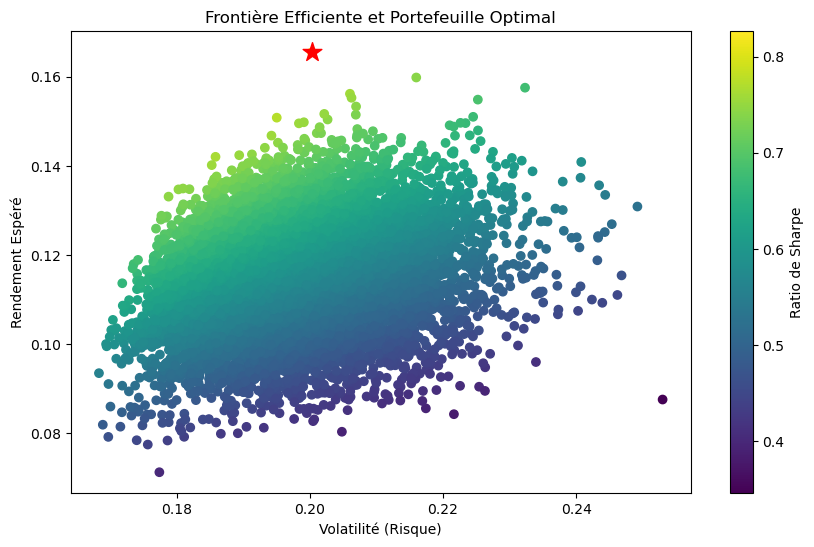

In [21]:
# Extraire les rendements, les volatilités, et les ratios de Sharpe
portfolio_returns = results[0]
portfolio_volatility = results[1]
sharpe_ratios = results[2]

# Tracer les portefeuilles générés
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_volatility, portfolio_returns, c=sharpe_ratios, cmap='viridis')
plt.colorbar(label='Ratio de Sharpe')

# Mettre en évidence le portefeuille avec le meilleur ratio de Sharpe
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='red', marker='*', s=200)
plt.title('Frontière Efficiente et Portefeuille Optimal')
plt.xlabel('Volatilité (Risque)')
plt.ylabel('Rendement Espéré')
plt.show()